In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
dataset = pd.read_csv("./Final Requirements Datasets/List of Regular Travelers in the Philippinestest.csv")

In [29]:
dataset.head(10)

,region,province_or_city,foreign_travelers,overseas_filipino,domestic_travelers,total_2012
0,NCR (National Capital Region),Total,1513402,20048,909212,2442662
1,NCR (National Capital Region),Caloocan City,-,-,-,0
2,NCR (National Capital Region),Las Pinas City,-,-,-,0
3,NCR (National Capital Region),Makati City,-,-,-,0
4,NCR (National Capital Region),Malabon City,-,-,-,0
5,NCR (National Capital Region),Mandaluyong City,-,-,-,0
6,NCR (National Capital Region),Manila,-,-,-,0
7,NCR (National Capital Region),Marikina City,-,-,-,0
8,NCR (National Capital Region),Muntinlupa City,-,-,-,0
9,NCR (National Capital Region),Navotas City,-,-,-,0


In [30]:
dataset = dataset[:-6]
df=dataset.loc[(dataset["province_or_city"] == "Total")]
df.head()



,region,province_or_city,foreign_travelers,overseas_filipino,domestic_travelers,total_2012
0,NCR (National Capital Region),Total,1513402,20048,909212,2442662
18,CAR (Cordillera Administrative Region),Total,77913,3712,830883,912508
26,I (Ilocos Region),Total,36172,586,633712,670470
59,II (Cagayan Valley),Total,12694,0,374749,387443
70,III (Central Luzon),Total,344329,10233,1719532,2074094


In [31]:
df=df.drop("province_or_city", axis=1).set_index("region")

In [35]:
df["foreign_travelers"] = pd.to_numeric(df["foreign_travelers"],errors='coerce').fillna(0).astype(int)
df["overseas_filipino"] = pd.to_numeric(df["overseas_filipino"],errors='coerce').fillna(0).astype(int)
df["domestic_travelers"] = pd.to_numeric(df["domestic_travelers"],errors='coerce').fillna(0).astype(int)
df["total_2012"] = pd.to_numeric(df["total_2012"],errors='coerce').fillna(0).astype(int)


In [36]:
df=df


In [39]:
df=df.sort_values("total_2012",axis=0,ascending=False)

In [40]:
df

,foreign_travelers,overseas_filipino,domestic_travelers,total_2012
region,,,,
V (Bicol Region),712707,60179,2911919,3684805
VI (Western Visayas),606521,58169,2434328,3099018
VII (Central Visayas),1161575,16121,1750385,2928081
NCR (National Capital Region),1513402,20048,909212,2442662
III (Central Luzon),344329,10233,1719532,2074094
XI (Davao Region),84134,10674,1480192,1575000
X (Northern Mindanao),50918,10091,1421811,1482820
IV-A (CALABARZON),80753,5308,1207221,1293282
IV-B (MIMAROPA),211534,9514,911808,1132856


In [41]:
df=df.drop("total_2012",axis=1)



In [42]:
type(df["overseas_filipino"]["NCR (National Capital Region)"])


numpy.int32

<AxesSubplot:title={'center':'Bar chart of travelers in the Philippines in 2012 by region and traveler type'}, xlabel='Region', ylabel='Travelers (in millions)'>

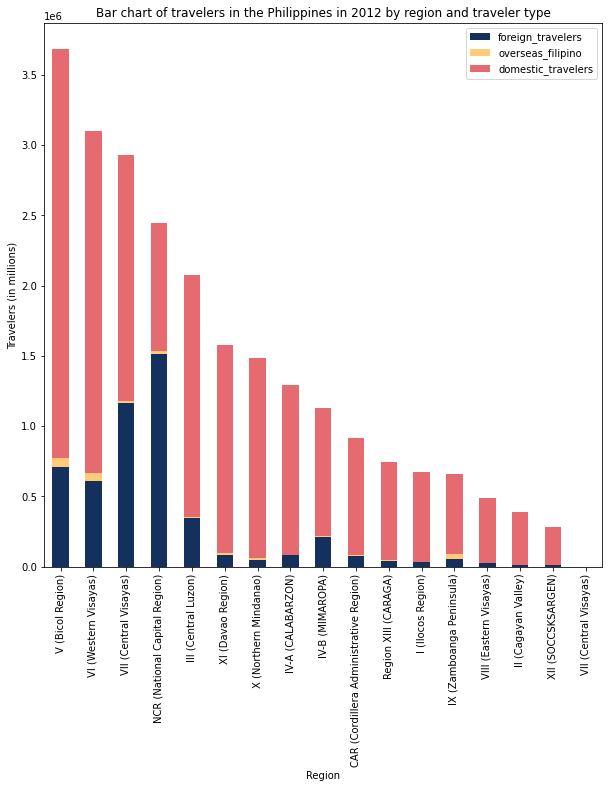

In [66]:
df.plot(kind="bar",figsize=(10,10),stacked=True,color=["#13315C","#FFCB77","#E56B70"],xlabel="Region",ylabel="Travelers (in millions)",title="Bar chart of travelers in the Philippines in 2012 by region and traveler type")


<AxesSubplot:title={'center':'Regional Proportions of Overseas Filipino Travel'}>

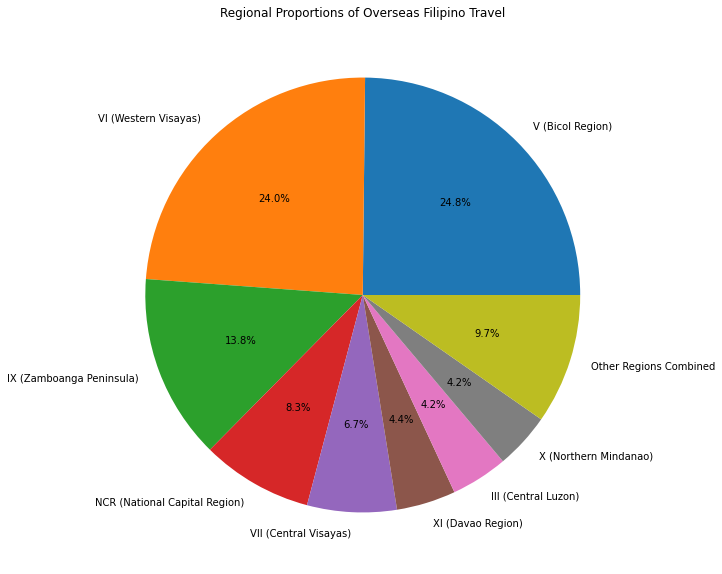

In [56]:
ofw = df["overseas_filipino"].sort_values(ascending = False)

labels=list(ofw.keys()[:8])

# comb=", ".join(ofw.keys()[5:])

# labels.append(comb)
labels.append("Other Regions Combined")

labels

top_8 = ofw.iloc[:8] 


others = ofw.iloc[8:].sum()
others

# df2 = pd.DataFrame([['others',others]])

others=pd.Series(others)

all_data = top_8.append(others, ignore_index=True)



all_data.index = labels


all_data.plot.pie(title="Regional Proportions of Overseas Filipino Travel",label="",autopct = '%1.1f%%',figsize=(10,10))


# df.overseas_filipino.plot.pie(autopct='%1.1f%%',figsize=(10,10))